In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms

In [0]:
transform = transforms.Compose(
    [transforms.Resize((32,32)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
Data = torchvision.datasets.ImageFolder(root="/content/gdrive/My Drive/Images", transform=transform)

In [0]:
train_size = int(0.8*len(Data))
test_size = len(Data) - train_size
trainset,testset = torch.utils.data.random_split(Data,[train_size,test_size])

trainloader = torch.utils.data.DataLoader(trainset, batch_size=3,shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=3,shuffle=False, num_workers=2)
print(type(trainloader))
print(len(trainloader))

<class 'torch.utils.data.dataloader.DataLoader'>
5498


tensor([38, 40, 60])


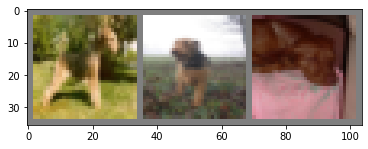

In [0]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

#classes = ('Chihuahua','Japanese_spaniel','Maltese_dog','Pekinese','Shih-Tzu','Blenheim_spaniel','papillon'
#,'toy_terrier','Rhodesian_ridgeback','Afghan_hound')

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.__next__()
print(labels)
# show images
imshow(torchvision.utils.make_grid(images))
# print labels

#print(' '.join('%5s' % classes[labels[j]] for j in range(3)))

In [0]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(3, 6, 5) #ouput  = image_size-(filter -1)
        self.conv2 = nn.Conv2d(6, 16, 5) 
        
        self.fc1 = nn.Linear(16 * 5 * 5, 300)
        self.fc2 = nn.Linear(300, 200)
        self.fc3 = nn.Linear(200, 120)

        self.pool = nn.MaxPool2d(2, 2)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))

        x = x.view(-1, 16*5*5)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [0]:
for epoch in range(20):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
    print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss /4124))
    running_loss = 0.0
            
print('Finished Training')

In [0]:
dataiter = iter(testloader)
images, labels = dataiter.__next__()

# print images
imshow(torchvision.utils.make_grid(images))

In [0]:
outputs = net(images)

In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))